### Prepare drive and files

In [1]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# !cd content/drive/My\ Drive/
!pwd
%cd drive/
os.chdir("My Drive")
# !ls

/content
/content/drive


In [5]:
!ls

 apps
'Colab Notebooks'
 im_base_to_angle_4.zip
 im_base_to_angle_5.zip
 Predict_angles_results.ipynb
 rotated
 rotated_2
 started_state
 Test_upload_large_files.ipynb
 trained_data
 trained_model_angles_v18_DI_PA_DN_and_L_PM_VGG16_20.15%.json
 trained_models
 trained_model_weights_angles_v18_DI_PA_DN_and_L_PM_VGG16_20.15%.h5
'Базы данных 2015'
'Бэкап Диплома'
'Бэкап диплома 2'
'Вопросы по api.gdoc'
 Диаграммы
'Для работы с диаграммами'
 НИР_2_семестр_заключит_выступл
 НИР_бэкап_18.09.18


In [6]:
!pwd

/content/drive/My Drive


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, InceptionResNetV2, Xception
import matplotlib.pyplot as plt
from sklearn.externals import joblib
# import keras
# from keras import backend as K
# from keras.callbacks import TensorBoard
# from keras.optimizers import adam
# from tensorflow.keras.callbacks import TensorBoard
# from tensorboardcolab import *
# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

import json
import pickle

In [0]:
filename = 'trained_data/SAV/X_to_PM_di_less_pa_RESHAPE.sav'
X = joblib.load(filename)
# pickle_in = open("trained_data/X_to_PM_di_less_pa.pickle","rb")
# X = pickle.load(pickle_in)

In [0]:
filename = 'trained_data/SAV/y_to_PM_di_less_pa_RESHAPE.sav'
y = joblib.load(filename)
# pickle_in = open("trained_data/y_to_PM_di_less_pa.pickle","rb")
# y = pickle.load(pickle_in)

In [10]:
X = X/255.0
print(X[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(1024, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dropout(0.5))

model.add(Dense(360))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 1024)      10240     
_________________________________________________________________
activation (Activation)      (None, 98, 98, 1024)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 1024)      0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 1024)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 512)       4719104   
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 512)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 512)       0         
__________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Trained model on clean images

In [0]:
model.fit(X, y, batch_size=batch_size, epochs=10, verbose=1, validation_split=0.3)

Train on 25200 samples, validate on 10800 samples
Epoch 1/10
25200/25200 [==============================] - 484s 19ms/step - loss: 3.0613 - acc: 0.2762 - val_loss: 0.6704 - val_acc: 0.7637
Epoch 2/10
25200/25200 [==============================] - 478s 19ms/step - loss: 0.5878 - acc: 0.7913 - val_loss: 0.1032 - val_acc: 0.9616
Epoch 3/10
25200/25200 [==============================] - 478s 19ms/step - loss: 0.2128 - acc: 0.9230 - val_loss: 0.0313 - val_acc: 0.9920
Epoch 4/10
25200/25200 [==============================] - 477s 19ms/step - loss: 0.1343 - acc: 0.9524 - val_loss: 0.0189 - val_acc: 0.9949
Epoch 5/10
25200/25200 [==============================] - 477s 19ms/step - loss: 0.1031 - acc: 0.9638 - val_loss: 0.0210 - val_acc: 0.9951
Epoch 6/10
25200/25200 [==============================] - 476s 19ms/step - loss: 0.0901 - acc: 0.9692 - val_loss: 0.0390 - val_acc: 0.9960
Epoch 7/10
25200/25200 [==============================] - 476s 19ms/step - loss: 0.0816 - acc: 0.9736 - val_loss: 0.

In [0]:
model_json = model.to_json()
json_file = open("trained_model_angles_v2.json", "w")
json_file.write(model_json)
json_file.close()

In [0]:
model.save_weights("trained_model_weights_angles_v2.h5")

### Trained model on clean images (Decrease number of epochs to 5)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [0]:
model.fit(X, y, batch_size=batch_size, epochs=5, validation_split=0.3, callbacks=[early_stopping])

Train on 25200 samples, validate on 10800 samples
Epoch 1/5
25200/25200 [==============================] - 480s 19ms/step - loss: 3.1304 - acc: 0.2673 - val_loss: 0.6698 - val_acc: 0.7623
Epoch 2/5
25200/25200 [==============================] - 478s 19ms/step - loss: 0.5919 - acc: 0.7870 - val_loss: 0.1098 - val_acc: 0.9614
Epoch 3/5
25200/25200 [==============================] - 478s 19ms/step - loss: 0.2321 - acc: 0.9159 - val_loss: 0.0474 - val_acc: 0.9828
Epoch 4/5
25200/25200 [==============================] - 477s 19ms/step - loss: 0.1583 - acc: 0.9419 - val_loss: 0.0423 - val_acc: 0.9870
Epoch 5/5
25200/25200 [==============================] - 477s 19ms/step - loss: 0.1231 - acc: 0.9572 - val_loss: 0.0270 - val_acc: 0.9915


In [0]:
model_json = model.to_json()
json_file = open("trained_model_angles_v3.json", "w")
json_file.write(model_json)
json_file.close()

In [0]:
model.save_weights("trained_model_weights_angles_v3.h5")

### Trained model on dirty images (50% and 5 epochs)

In [0]:
model.fit(X, y, batch_size=batch_size, epochs=5, validation_split=0.3, callbacks=[early_stopping])

Train on 41832 samples, validate on 17928 samples
Epoch 1/5
41832/41832 [==============================] - 834s 20ms/step - loss: 3.7950 - acc: 0.0935 - val_loss: 2.4028 - val_acc: 0.2379
Epoch 2/5
41832/41832 [==============================] - 807s 19ms/step - loss: 2.2752 - acc: 0.2557 - val_loss: 1.6920 - val_acc: 0.3654
Epoch 3/5
41832/41832 [==============================] - 807s 19ms/step - loss: 1.8114 - acc: 0.3406 - val_loss: 1.4435 - val_acc: 0.4437
Epoch 4/5
41832/41832 [==============================] - 806s 19ms/step - loss: 1.6382 - acc: 0.3787 - val_loss: 1.3591 - val_acc: 0.4613
Epoch 5/5
41832/41832 [==============================] - 806s 19ms/step - loss: 1.5447 - acc: 0.4039 - val_loss: 1.2679 - val_acc: 0.4995


In [0]:
model_json = model.to_json()
json_file = open("trained_model_angles_v4_DI_50%.json", "w")
json_file.write(model_json)
json_file.close()

In [0]:
model.save_weights("trained_model_weights_angles_v4_DI_50%.h5")

### Trained model on dirty images (10 epochs)

In [0]:
model.fit(X, y, batch_size=batch_size, epochs=10, validation_split=0.3)

# model_json = model.to_json()
# json_file = open("trained_model_angles_v5_DI_???%.json", "w")
# json_file.write(model_json)
# json_file.close()

# model.save_weights("trained_model_weights_angles_v5_DI_???%.h5")

Train on 34524 samples, validate on 14796 samples
Epoch 1/10
34524/34524 [==============================] - 677s 20ms/step - loss: 4.0931 - acc: 0.0731 - val_loss: 2.7353 - val_acc: 0.1795
Epoch 2/10
34524/34524 [==============================] - 660s 19ms/step - loss: 2.5593 - acc: 0.2086 - val_loss: 1.8898 - val_acc: 0.3381
Epoch 3/10
34524/34524 [==============================] - 660s 19ms/step - loss: 1.9679 - acc: 0.3068 - val_loss: 1.5790 - val_acc: 0.3990
Epoch 4/10
34524/34524 [==============================] - 659s 19ms/step - loss: 1.7202 - acc: 0.3606 - val_loss: 1.4155 - val_acc: 0.4448
Epoch 5/10
34524/34524 [==============================] - 659s 19ms/step - loss: 1.5991 - acc: 0.3857 - val_loss: 1.3319 - val_acc: 0.4682
Epoch 6/10
34524/34524 [==============================] - 659s 19ms/step - loss: 1.5192 - acc: 0.4066 - val_loss: 1.2932 - val_acc: 0.4923
Epoch 7/10
34524/34524 [==============================] - 659s 19ms/step - loss: 1.4578 - acc: 0.4225 - val_loss: 1.

In [0]:
model_json = model.to_json()
json_file = open("trained_model_angles_v6_DI_55%.json", "w")
json_file.write(model_json)
json_file.close()

In [0]:
model.save_weights("trained_model_weights_angles_v6_DI_55%.h5")

In [0]:
model_different_neurons = Sequential()

In [0]:
model_different_neurons.add(Conv2D(1024, (3, 3), input_shape=X.shape[1:]))
model_different_neurons.add(Activation('relu'))
model_different_neurons.add(MaxPooling2D(pool_size=(2, 2)))

model_different_neurons.add(Dropout(0.25))

model_different_neurons.add(Conv2D(512, (3, 3)))
model_different_neurons.add(Activation('relu'))
model_different_neurons.add(MaxPooling2D(pool_size=(2, 2)))

model_different_neurons.add(Dropout(0.5))

model_different_neurons.add(Conv2D(512, (3, 3)))
model_different_neurons.add(Activation('relu'))
model_different_neurons.add(MaxPooling2D(pool_size=(2, 2)))

model_different_neurons.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model_different_neurons.add(Dense(256))

model_different_neurons.add(Dropout(0.5))

model_different_neurons.add(Dense(360))
model_different_neurons.add(Activation('softmax'))
model_different_neurons.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 1024)      10240     
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 1024)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 1024)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 1024)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 512)       4719104   
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 512)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 512)       0         
__________

In [0]:
model_different_neurons.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model_different_neurons.fit(X, y, batch_size=batch_size, epochs=10, validation_split=0.3)

Train on 34524 samples, validate on 14796 samples
Epoch 1/10
34524/34524 [==============================] - 709s 21ms/step - loss: 3.6670 - acc: 0.0970 - val_loss: 2.6813 - val_acc: 0.2086
Epoch 2/10
34524/34524 [==============================] - 693s 20ms/step - loss: 2.4183 - acc: 0.2359 - val_loss: 1.9296 - val_acc: 0.3331
Epoch 3/10
34524/34524 [==============================] - 693s 20ms/step - loss: 1.9482 - acc: 0.3159 - val_loss: 1.6631 - val_acc: 0.3877
Epoch 4/10
34524/34524 [==============================] - 693s 20ms/step - loss: 1.7304 - acc: 0.3633 - val_loss: 1.5018 - val_acc: 0.4243
Epoch 5/10
34524/34524 [==============================] - 693s 20ms/step - loss: 1.6082 - acc: 0.3915 - val_loss: 1.4438 - val_acc: 0.4402
Epoch 6/10
34524/34524 [==============================] - 693s 20ms/step - loss: 1.5203 - acc: 0.4095 - val_loss: 1.3972 - val_acc: 0.4398
Epoch 7/10
34524/34524 [==============================] - 692s 20ms/step - loss: 1.4580 - acc: 0.4317 - val_loss: 1.

In [0]:
model_json = model_different_neurons.to_json()
json_file = open("trained_model_angles_v7_DI_different_neurons_50%.json", "w")
json_file.write(model_json)
json_file.close()

In [0]:
model_different_neurons.save_weights("trained_model_weights_angles_v7_DI_different_neurons_50%.h5")

### Pretrained model VGG16 (less training data)

In [0]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

In [0]:
vgg16_net.trainable = False

vgg16_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:
model_with_VGG16 = Sequential()
model_with_VGG16.add(vgg16_net)
model_with_VGG16.add(Flatten())
model_with_VGG16.add(Dense(256))
model_with_VGG16.add(Activation('relu'))
model_with_VGG16.add(Dropout(0.5))
model_with_VGG16.add(Dense(360))
model_with_VGG16.add(Activation('softmax'))

model_with_VGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 360)               92520     
_________________________________________________________________
activation_3 (Activation)    (None, 360)               0         
Total para

In [0]:
model_with_VGG16.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model_with_VGG16.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 47s 4ms/step - loss: 5.2076 - acc: 0.0170 - val_loss: 4.0872 - val_acc: 0.0515
Epoch 2/10
12600/12600 [==============================] - 46s 4ms/step - loss: 4.1963 - acc: 0.0384 - val_loss: 3.5348 - val_acc: 0.0870
Epoch 3/10
12600/12600 [==============================] - 46s 4ms/step - loss: 3.8301 - acc: 0.0543 - val_loss: 3.2094 - val_acc: 0.1300
Epoch 4/10
12600/12600 [==============================] - 46s 4ms/step - loss: 3.5694 - acc: 0.0702 - val_loss: 2.9644 - val_acc: 0.1365
Epoch 5/10
12600/12600 [==============================] - 46s 4ms/step - loss: 3.4176 - acc: 0.0807 - val_loss: 2.7720 - val_acc: 0.1646
Epoch 6/10
12600/12600 [==============================] - 46s 4ms/step - loss: 3.3116 - acc: 0.0858 - val_loss: 2.6695 - val_acc: 0.1644
Epoch 7/10
12600/12600 [==============================] - 46s 4ms/step - loss: 3.2101 - acc: 0.0930 - val_loss: 2.5194 - val_acc:

In [0]:
val_acc_percent = history.history['val_acc'][-1] * 100
val_acc_percent = round(val_acc_percent, 2)
print(val_acc_percent)

20.15


In [0]:
model_json = model_with_VGG16.to_json()
json_file = open(f"trained_model_angles_v18_DI_PA_DN_and_L_PM_VGG16_{val_acc_percent}%.json", "w")
json_file.write(model_json)
json_file.close()

model_with_VGG16.save_weights(f"trained_model_weights_angles_v18_DI_PA_DN_and_L_PM_VGG16_{val_acc_percent}%.h5")

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
print(history.history['acc'])

[0.016984126984126983, 0.03841269841742894, 0.05428571428807955, 0.07023809523809524, 0.08071428571428571, 0.08579365080311185, 0.09301587302533407, 0.10484126984126985, 0.10746031746031746, 0.11126984126984127]


In [0]:
print(history.history['val_acc'])

[0.05148148148148148, 0.08703703704807493, 0.13, 0.13648148150355727, 0.16462962964066752, 0.16444444444444445, 0.19851851847436694, 0.19240740740740742, 0.2025925926146684, 0.20148148148148148]


In [0]:
print(history.history['loss'])

[5.207572626083616, 4.196287537075224, 3.8301443652501184, 3.569362071355184, 3.4175871169377885, 3.311602895070636, 3.2100796272641134, 3.1339460419851637, 3.0919786158062164, 3.023083575263856]


In [0]:
print(history.history['val_loss'])

[4.0872030886897335, 3.5347552281838874, 3.209448223820439, 2.9643578766010426, 2.7720366679297554, 2.669478952972977, 2.5193757223199915, 2.403506504694621, 2.3798974418640135, 2.341561801698473]


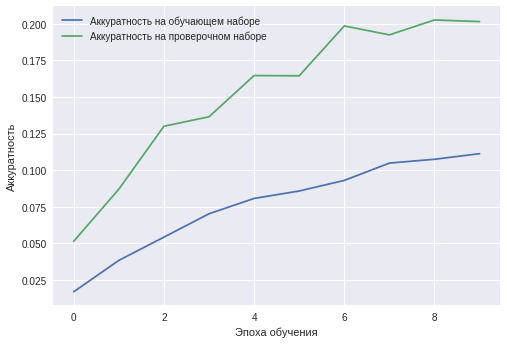

In [0]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

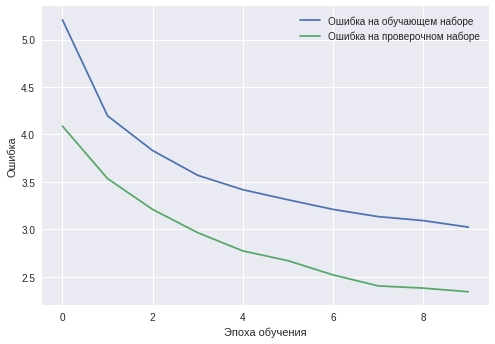

In [0]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Pretrained model VGG19 (less training data)

In [11]:
vgg19_net = VGG19(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

80142336/80134624 [==============================] - 3s 0us/step


In [12]:
vgg19_net.trainable = False

vgg19_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [13]:
model_with_VGG19 = Sequential()
model_with_VGG19.add(vgg19_net)
model_with_VGG19.add(Flatten())
model_with_VGG19.add(Dense(256))
model_with_VGG19.add(Activation('relu'))
model_with_VGG19.add(Dropout(0.5))
model_with_VGG19.add(Dense(360))
model_with_VGG19.add(Activation('softmax'))

model_with_VGG19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 360)               92520     
_________________________________________________________________
activation_1 (Activation)    (None, 360)               0         
Total para

In [0]:
model_with_VGG19.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model_with_VGG19.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 58s 5ms/step - loss: 5.4159 - acc: 0.0131 - val_loss: 4.4974 - val_acc: 0.0415
Epoch 2/10
12600/12600 [==============================] - 54s 4ms/step - loss: 4.5954 - acc: 0.0267 - val_loss: 3.8400 - val_acc: 0.0631
Epoch 3/10
12600/12600 [==============================] - 54s 4ms/step - loss: 4.2674 - acc: 0.0363 - val_loss: 3.5329 - val_acc: 0.0876
Epoch 4/10
12600/12600 [==============================] - 54s 4ms/step - loss: 4.0810 - acc: 0.0437 - val_loss: 3.3484 - val_acc: 0.0993
Epoch 5/10
12600/12600 [==============================] - 54s 4ms/step - loss: 3.9864 - acc: 0.0463 - val_loss: 3.2522 - val_acc: 0.1061
Epoch 6/10
12600/12600 [==============================] - 54s 4ms/step - loss: 3.8948 - acc: 0.0518 - val_loss: 3.1612 - val_acc: 0.1119
Epoch 7/10
12600/12600 [==============================] - 54s 4ms/step - loss: 3.8530 - acc: 0.0558 - val_loss: 3.0987 - val_acc:

In [16]:
val_acc_percent = history.history['val_acc'][-1] * 100
val_acc_percent = round(val_acc_percent, 2)
print(val_acc_percent)

16.04


In [0]:
model_json = model_with_VGG19.to_json()
json_file = open(f"trained_model_angles_v19_DI_PA_DN_and_L_PM_VGG19_{val_acc_percent}%.json", "w")
json_file.write(model_json)
json_file.close()

model_with_VGG19.save_weights(f"trained_model_weights_angles_v19_DI_PA_DN_and_L_PM_VGG19_{val_acc_percent}%.h5")

In [18]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [19]:
print(history.history['acc'])

[0.013095238095238096, 0.026746031746031747, 0.03626984126984127, 0.043650793653158916, 0.04634920634920635, 0.05182539683012735, 0.05579365079365079, 0.061269841272206534, 0.06007936508409561, 0.06198412698412698]


In [20]:
print(history.history['val_acc'])

[0.04148148148148148, 0.0631481481536671, 0.0875925925925926, 0.0992592592647782, 0.10611111111111111, 0.11185185186288975, 0.13129629631837209, 0.13500000004415158, 0.15333333333333332, 0.16037037037588933]


In [21]:
print(history.history['loss'])

[5.415906982119121, 4.595434879121326, 4.2673901246086, 4.081041501211741, 3.986441024598621, 3.894768637399825, 3.8529835641951786, 3.7842820650433735, 3.7700516269320534, 3.7210639653887068]


In [22]:
print(history.history['val_loss'])

[4.4973541146737555, 3.840039906325164, 3.5328690617172804, 3.348353158456308, 3.2522215451134575, 3.161158306333754, 3.0987422844215677, 2.990865995972245, 2.9426849534776474, 2.861060343495122]


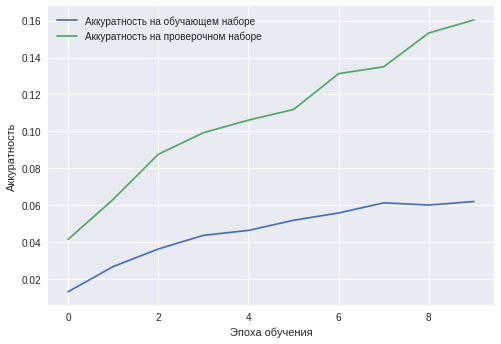

In [23]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

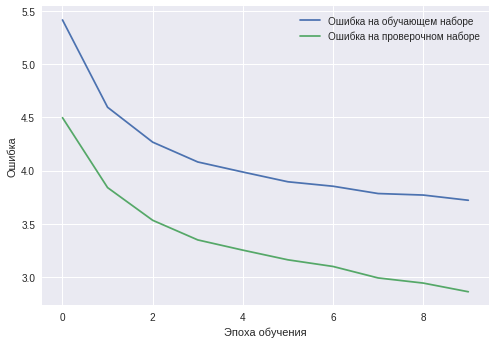

In [24]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Pretrained model Xception (less training data)

In [25]:
xception_net = Xception(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

83689472/83683744 [==============================] - 3s 0us/step


In [26]:
xception_net.trainable = False

xception_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [27]:
model_with_xception = Sequential()
model_with_xception.add(xception_net)
model_with_xception.add(Flatten())
model_with_xception.add(Dense(256))
model_with_xception.add(Activation('relu'))
model_with_xception.add(Dropout(0.5))
model_with_xception.add(Dense(360))
model_with_xception.add(Activation('softmax'))

model_with_xception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4718848   
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 360)               92520     
_________________________________________________________________
activation_3 (Activation)    (None, 360)               0         
Total para

In [0]:
model_with_xception.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
history = model_with_xception.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 48s 4ms/step - loss: 5.7559 - acc: 0.0064 - val_loss: 5.1465 - val_acc: 0.0191
Epoch 2/10
12600/12600 [==============================] - 45s 4ms/step - loss: 5.0956 - acc: 0.0193 - val_loss: 4.3510 - val_acc: 0.0361
Epoch 3/10
12600/12600 [==============================] - 45s 4ms/step - loss: 4.7156 - acc: 0.0310 - val_loss: 4.0492 - val_acc: 0.0528
Epoch 4/10
12600/12600 [==============================] - 45s 4ms/step - loss: 4.4875 - acc: 0.0356 - val_loss: 3.7905 - val_acc: 0.0602
Epoch 5/10
12600/12600 [==============================] - 45s 4ms/step - loss: 4.2928 - acc: 0.0444 - val_loss: 3.5642 - val_acc: 0.0611
Epoch 6/10
12600/12600 [==============================] - 45s 4ms/step - loss: 4.1613 - acc: 0.0475 - val_loss: 3.4429 - val_acc: 0.0772
Epoch 7/10
12600/12600 [==============================] - 45s 4ms/step - loss: 4.0532 - acc: 0.0546 - val_loss: 3.4444 - val_acc:

In [30]:
val_acc_percent = history.history['val_acc'][-1] * 100
val_acc_percent = round(val_acc_percent, 2)
print(val_acc_percent)

9.44


In [0]:
model_json = model_with_xception.to_json()
json_file = open(f"trained_model_angles_v20_DI_PA_DN_and_L_PM_Xception_{val_acc_percent}%.json", "w")
json_file.write(model_json)
json_file.close()

model_with_xception.save_weights(f"trained_model_weights_angles_v20_DI_PA_DN_and_L_PM_Xception_{val_acc_percent}%.h5")

In [32]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [33]:
print(history.history['acc'])

[0.0064285714285714285, 0.019285714285714285, 0.030952380952380953, 0.0356349206372859, 0.04436507936744463, 0.04746031746504799, 0.054603174603174605, 0.06031746032219085, 0.06420634920634921, 0.06936507936744463]


In [34]:
print(history.history['val_acc'])

[0.019074074079593023, 0.03611111111663006, 0.052777777783296724, 0.060185185190704135, 0.06111111111663006, 0.07722222222774117, 0.08203703704807494, 0.07740740741292636, 0.08518518518518518, 0.09444444445548233]


In [35]:
print(history.history['loss'])

[5.755886360955617, 5.09557245769198, 4.71558367047991, 4.487531715877473, 4.292770169576009, 4.161265091668992, 4.0531894479479105, 3.9428756500425792, 3.8793736323099286, 3.7992486183227054]


In [36]:
print(history.history['val_loss'])

[5.146459571697094, 4.350984956246835, 4.049168458867956, 3.790469651398835, 3.5641648246623854, 3.4429021891841183, 3.444423779734859, 3.3341255452897816, 3.1878931289248995, 3.1613684078499125]


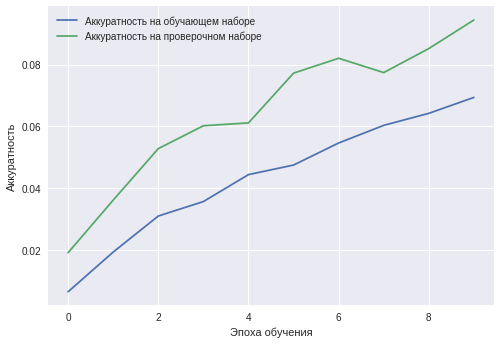

In [37]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

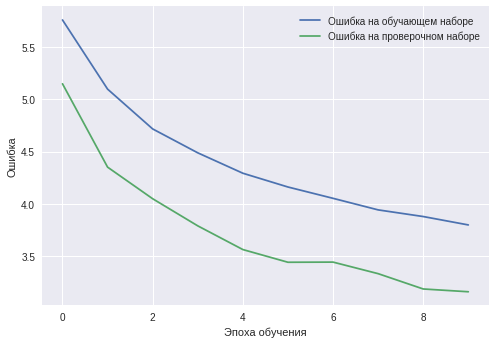

In [38]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Pretrained model ResNet50 (less training data)

In [39]:
resnet50_net = ResNet50(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [40]:
resnet50_net.trainable = False

resnet50_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [41]:
model_with_resnet50 = Sequential()
model_with_resnet50.add(resnet50_net)
model_with_resnet50.add(Flatten())
model_with_resnet50.add(Dense(256))
model_with_resnet50.add(Activation('relu'))
model_with_resnet50.add(Dropout(0.5))
model_with_resnet50.add(Dense(360))
model_with_resnet50.add(Activation('softmax'))

model_with_resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8388864   
_________________________________________________________________
activation_53 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 360)               92520     
_________________________________________________________________
activation_54 (Activation)   (None, 360)               0         
Total para

In [0]:
model_with_resnet50.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
history = model_with_resnet50.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 56s 4ms/step - loss: 5.9625 - acc: 0.0037 - val_loss: 5.8885 - val_acc: 0.0017
Epoch 2/10
12600/12600 [==============================] - 51s 4ms/step - loss: 5.8763 - acc: 0.0039 - val_loss: 5.8129 - val_acc: 0.0026
Epoch 3/10
12600/12600 [==============================] - 51s 4ms/step - loss: 5.8137 - acc: 0.0049 - val_loss: 5.7422 - val_acc: 0.0035
Epoch 4/10
12600/12600 [==============================] - 51s 4ms/step - loss: 5.8064 - acc: 0.0048 - val_loss: 5.6833 - val_acc: 0.0054
Epoch 5/10
12600/12600 [==============================] - 51s 4ms/step - loss: 5.7723 - acc: 0.0047 - val_loss: 5.6182 - val_acc: 0.0072
Epoch 6/10
12600/12600 [==============================] - 51s 4ms/step - loss: 5.7408 - acc: 0.0063 - val_loss: 5.5697 - val_acc: 0.0083
Epoch 7/10
12600/12600 [==============================] - 51s 4ms/step - loss: 5.7286 - acc: 0.0059 - val_loss: 5.5727 - val_acc:

In [44]:
val_acc_percent = history.history['val_acc'][-1] * 100
val_acc_percent = round(val_acc_percent, 2)
print(val_acc_percent)

0.63


In [0]:
model_json = model_with_resnet50.to_json()
json_file = open(f"trained_model_angles_v21_DI_PA_DN_and_L_PM_ResNet50_{val_acc_percent}%.json", "w")
json_file.write(model_json)
json_file.close()

model_with_resnet50.save_weights(f"trained_model_weights_angles_v21_DI_PA_DN_and_L_PM_ResNet50_{val_acc_percent}%.h5")

In [46]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [47]:
print(history.history['acc'])

[0.003650793650793651, 0.0038888888888888888, 0.004920634920634921, 0.004841269841269842, 0.004682539682539682, 0.00626984126984127, 0.005873015873015873, 0.006349206349206349, 0.006111111111111111, 0.006746031746031746]


In [48]:
print(history.history['val_acc'])

[0.0016666666666666668, 0.002592592598111541, 0.003518518524037467, 0.00537037037037037, 0.007222222222222222, 0.008333333333333333, 0.007962962962962963, 0.005555555555555556, 0.0064814814925193785, 0.0062962963018152445]


In [49]:
print(history.history['loss'])

[5.962463076455252, 5.876327570355127, 5.8137321989876884, 5.806393519810268, 5.772328279586065, 5.740847100454664, 5.728599850790841, 5.715881886557927, 5.704909539298406, 5.708747504098075]


In [50]:
print(history.history['val_loss'])

[5.8884789615207245, 5.812886770036485, 5.742194122738308, 5.6832504187689885, 5.618165538222701, 5.569731607083921, 5.572732619532832, 5.529414228509974, 5.509588622340449, 5.494718290964762]


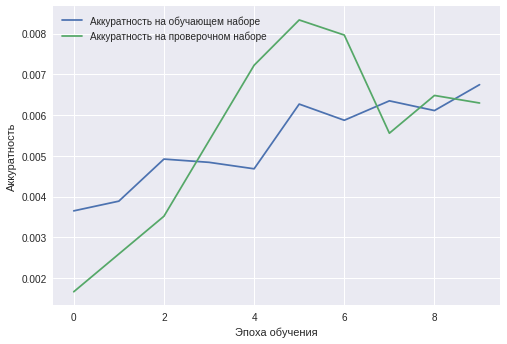

In [51]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

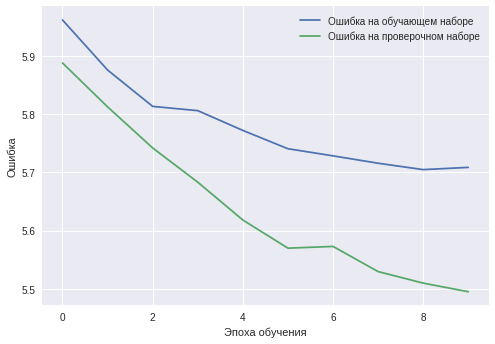

In [52]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Pretrained model InceptionV3 (less training data)

In [53]:
inception_v3_net = InceptionV3(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

87916544/87910968 [==============================] - 3s 0us/step


In [54]:
inception_v3_net.trainable = False

inception_v3_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 49, 49, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 49, 49, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_55 (Activation)      (None, 49, 49, 32)   0           batch_normalization_4[0][0]      
__________________________________________________________________________________________________
conv2d_5 (

In [55]:
model_with_inception_v3 = Sequential()
model_with_inception_v3.add(inception_v3_net)
model_with_inception_v3.add(Flatten())
model_with_inception_v3.add(Dense(256))
model_with_inception_v3.add(Activation('relu'))
model_with_inception_v3.add(Dropout(0.5))
model_with_inception_v3.add(Dense(360))
model_with_inception_v3.add(Activation('softmax'))

model_with_inception_v3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               524544    
_________________________________________________________________
activation_149 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 360)               92520     
_________________________________________________________________
activation_150 (Activation)  (None, 360)               0         
Total para

In [0]:
model_with_inception_v3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
history = model_with_inception_v3.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 43s 3ms/step - loss: 5.8926 - acc: 0.0030 - val_loss: 5.8304 - val_acc: 0.0063
Epoch 2/10
12600/12600 [==============================] - 36s 3ms/step - loss: 5.7112 - acc: 0.0082 - val_loss: 5.5316 - val_acc: 0.0085
Epoch 3/10
12600/12600 [==============================] - 36s 3ms/step - loss: 5.4737 - acc: 0.0113 - val_loss: 5.2352 - val_acc: 0.0178
Epoch 4/10
12600/12600 [==============================] - 36s 3ms/step - loss: 5.2890 - acc: 0.0130 - val_loss: 5.0243 - val_acc: 0.0189
Epoch 5/10
12600/12600 [==============================] - 36s 3ms/step - loss: 5.1684 - acc: 0.0149 - val_loss: 4.8709 - val_acc: 0.0196
Epoch 6/10
12600/12600 [==============================] - 36s 3ms/step - loss: 5.0816 - acc: 0.0172 - val_loss: 4.7950 - val_acc: 0.0222
Epoch 7/10
12600/12600 [==============================] - 35s 3ms/step - loss: 4.9914 - acc: 0.0189 - val_loss: 4.6819 - val_acc:

In [58]:
val_acc_percent = history.history['val_acc'][-1] * 100
val_acc_percent = round(val_acc_percent, 2)
print(val_acc_percent)

2.94


In [0]:
model_json = model_with_inception_v3.to_json()
json_file = open(f"trained_model_angles_v22_DI_PA_DN_and_L_PM_InceptionV3_{val_acc_percent}%.json", "w")
json_file.write(model_json)
json_file.close()

model_with_inception_v3.save_weights(f"trained_model_weights_angles_v22_DI_PA_DN_and_L_PM_InceptionV3_{val_acc_percent}%.h5")

In [60]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [61]:
print(history.history['acc'])

[0.003015873015873016, 0.008174603174603175, 0.011349206349206348, 0.013015873015873015, 0.014920634920634921, 0.017222222222222222, 0.01888888888888889, 0.018174603174603173, 0.017142857142857144, 0.02142857142857143]


In [62]:
print(history.history['val_acc'])

[0.006296296296296296, 0.008518518518518519, 0.017777777777777778, 0.01888888888888889, 0.01962962963514858, 0.02222222222774117, 0.027777777777777776, 0.024814814820333764, 0.02722222222222222, 0.029444444455482343]


In [63]:
print(history.history['loss'])

[5.89255036399478, 5.711214426434229, 5.473720665280781, 5.288974043830993, 5.16844456354777, 5.081626848796057, 4.991401127103775, 4.949707268306187, 4.90510659868755, 4.872565044524178]


In [64]:
print(history.history['val_loss'])

[5.830367079134341, 5.531559926492196, 5.235168327048973, 5.024329984452989, 4.870908836788601, 4.794990846845839, 4.6818898384659375, 4.642607330746121, 4.5664109215913, 4.536065204055221]


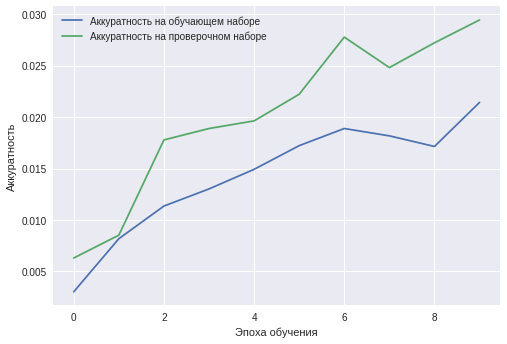

In [65]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

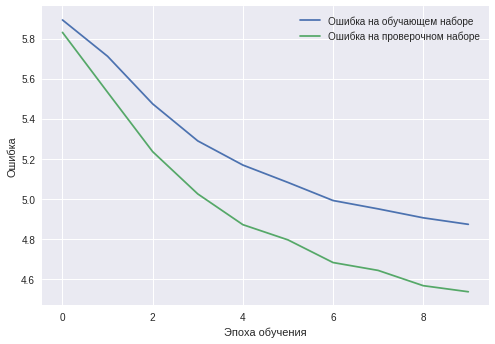

In [66]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Pretrained model InceptionResNetV2 (less training data)

In [67]:
inception_resnet_v2_net = InceptionResNetV2(weights='imagenet', 
                  include_top=False, 
                  input_shape=(100, 100, 3))

219062272/219055592 [==============================] - 6s 0us/step


In [68]:
inception_resnet_v2_net.trainable = False

inception_resnet_v2_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 49, 49, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 49, 49, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_151 (Activation)     (None, 49, 49, 32)   0           batch_normalization_98[0][0]     
__________________________________________________________________________________________________
conv2d_99 

In [69]:
model_with_inception_resnet_v2 = Sequential()
model_with_inception_resnet_v2.add(inception_resnet_v2_net)
model_with_inception_resnet_v2.add(Flatten())
model_with_inception_resnet_v2.add(Dense(256))
model_with_inception_resnet_v2.add(Activation('relu'))
model_with_inception_resnet_v2.add(Dropout(0.5))
model_with_inception_resnet_v2.add(Dense(360))
model_with_inception_resnet_v2.add(Activation('softmax'))

model_with_inception_resnet_v2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1, 1, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               393472    
_________________________________________________________________
activation_354 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 360)               92520     
_________________________________________________________________
activation_355 (Activation)  (None, 360)               0         
Total para

In [0]:
model_with_inception_resnet_v2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
history = model_with_inception_resnet_v2.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 12600 samples, validate on 5400 samples
Epoch 1/10
12600/12600 [==============================] - 103s 8ms/step - loss: 5.3229 - acc: 0.0171 - val_loss: 4.7091 - val_acc: 0.0322
Epoch 2/10
12600/12600 [==============================] - 83s 7ms/step - loss: 4.3408 - acc: 0.0398 - val_loss: 3.9312 - val_acc: 0.0519
Epoch 3/10
12600/12600 [==============================] - 83s 7ms/step - loss: 3.9549 - acc: 0.0568 - val_loss: 3.7646 - val_acc: 0.0613
Epoch 4/10
12600/12600 [==============================] - 83s 7ms/step - loss: 3.6999 - acc: 0.0625 - val_loss: 3.4542 - val_acc: 0.0706
Epoch 5/10
12600/12600 [==============================] - 83s 7ms/step - loss: 3.6024 - acc: 0.0664 - val_loss: 3.5833 - val_acc: 0.0583
Epoch 6/10
12600/12600 [==============================] - 83s 7ms/step - loss: 3.4625 - acc: 0.0735 - val_loss: 3.3048 - val_acc: 0.0807
Epoch 7/10
12600/12600 [==============================] - 83s 7ms/step - loss: 3.4033 - acc: 0.0795 - val_loss: 3.2230 - val_acc

In [72]:
val_acc_percent = history.history['val_acc'][-1] * 100
val_acc_percent = round(val_acc_percent, 2)
print(val_acc_percent)

8.44


In [0]:
model_json = model_with_inception_resnet_v2.to_json()
json_file = open(f"trained_model_angles_v23_DI_PA_DN_and_L_PM_InceptionResNetV2_{val_acc_percent}%.json", "w")
json_file.write(model_json)
json_file.close()

model_with_inception_resnet_v2.save_weights(f"trained_model_weights_angles_v23_DI_PA_DN_and_L_PM_InceptionResNetV2_{val_acc_percent}%.h5")

In [74]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [75]:
print(history.history['acc'])

[0.017142857142857144, 0.03976190476190476, 0.05682539682539683, 0.06253968254204781, 0.06642857143330196, 0.07349206350152454, 0.07952380952380952, 0.0856349206372859, 0.08579365079838132, 0.09206349205403101]


In [76]:
print(history.history['val_acc'])

[0.03222222222774117, 0.05185185185185185, 0.06129629630733419, 0.0705555555610745, 0.05833333333885228, 0.08074074071866495, 0.07962962963514858, 0.08388888889992678, 0.08703703704255598, 0.08444444445548234]


In [77]:
print(history.history['loss'])

[5.322868290855771, 4.340831454140799, 3.9548580943213567, 3.699933922782777, 3.602411673560975, 3.4625094106462266, 3.40326732832288, 3.3558008054703, 3.2802745310465493, 3.2378782785506477]


In [78]:
print(history.history['val_loss'])

[4.709086663281476, 3.931168437533908, 3.7645539958388716, 3.454182390636868, 3.5833134813661927, 3.304818096867314, 3.223049268722534, 3.2348992566709165, 3.108875397576226, 3.1359890492757163]


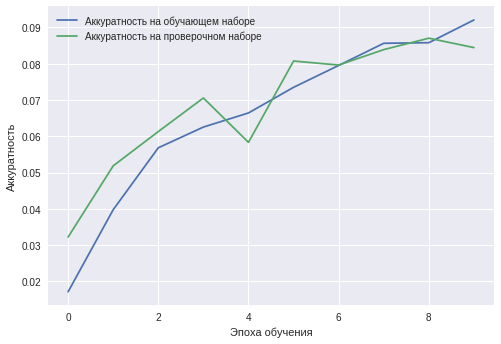

In [79]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

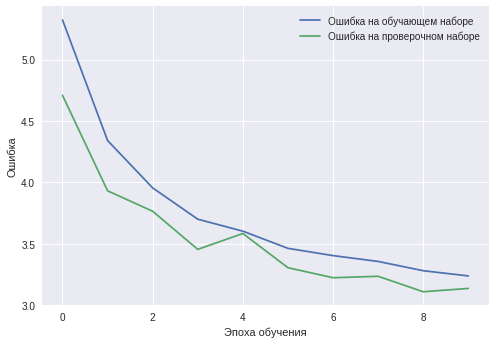

In [80]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()